In [ ]:
%matplotlib inline
from pylab import *
from sci378.stats import *

Version:  0.0.37


https://www.sumsar.net/best_online/

In [ ]:
group_1=[float(x) for x in "1.96 2.06 2.03 2.11 1.88 1.88 2.08 1.93 2.03 2.03 2.03 2.08 2.03 2.11 1.93".split()]
group_2=[float(x) for x in "1.83 1.93 1.88 1.85 1.85 1.91 1.91 1.85 1.78 1.91 1.93 1.80 1.80 1.85 1.93 1.85 1.83 1.85 1.91 1.85 1.91 1.85 1.80 1.80 1.85".split()]

In [ ]:
def logprior(μ1,σ1,μ2,σ2,ν):
    value=0
    
    value+=logNormal(μ1,0,100)  # wide prior on μ1
    value+=logJeffreys(σ1)
    value+=logNormal(μ2,0,100)
    value+=logJeffreys(σ2)
    value+=logExponential(ν-1,29)  # large ν = Normal, small ν = outliery
    
    return value

def loglikelihood(data,μ1,σ1,μ2,σ2,ν):
    x,y=data
    value=0
        
    value+=logStudent_T(x-μ1,ν,0,σ1)
    value+=logStudent_T(y-μ2,ν,0,σ2)
    
    return value

In [ ]:
model=MCMCModel((group_1,group_2),loglikelihood,logprior)
model.run_mcmc(500,repeat=3,verbose=True)

Sampling Prior...
Done.
0.36 s
Running MCMC 1/3...
Done.
1.01 s
Running MCMC 2/3...
Done.
1.13 s
Running MCMC 3/3...
Done.
1.12 s


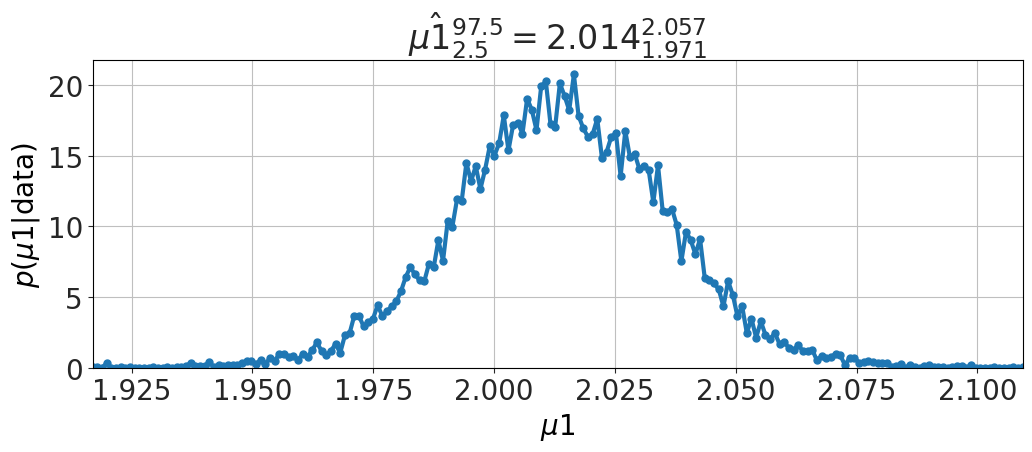

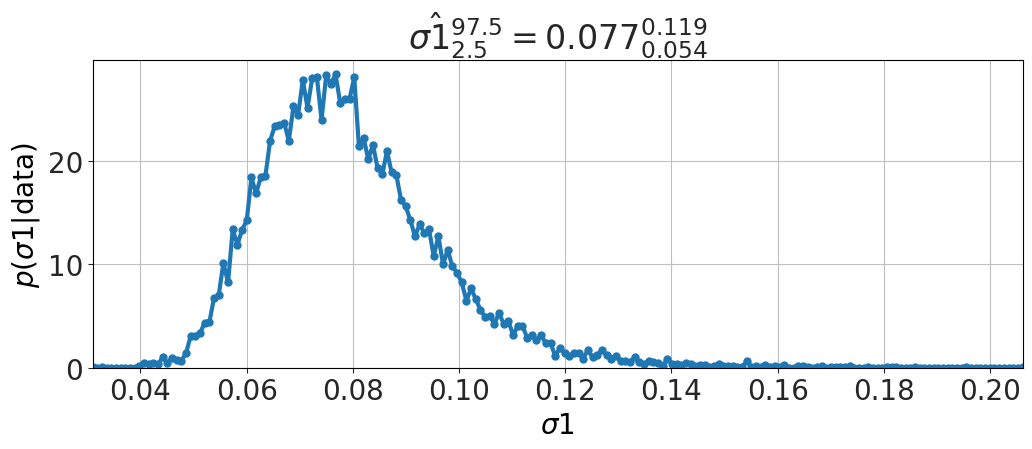

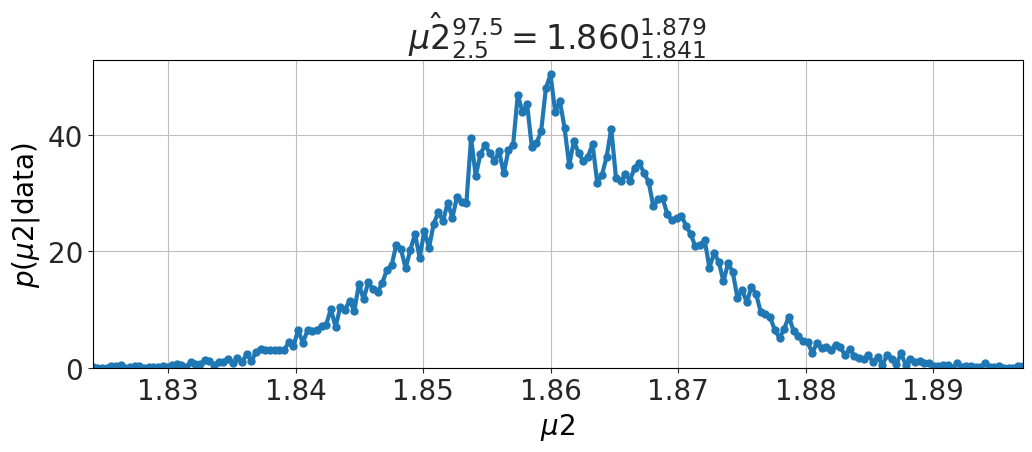

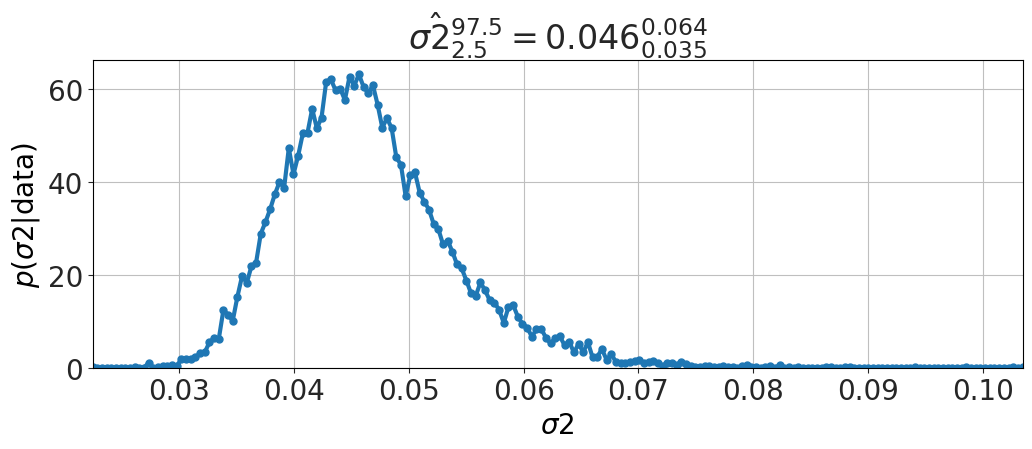

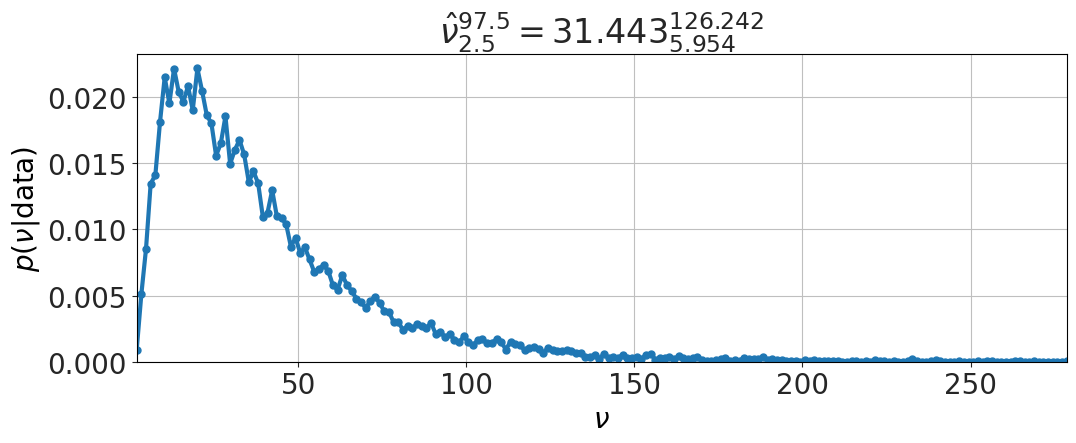

In [ ]:
model.plot_distributions()

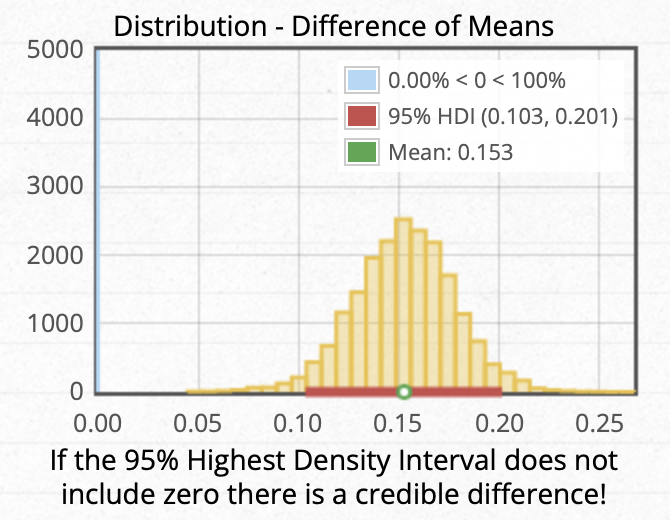

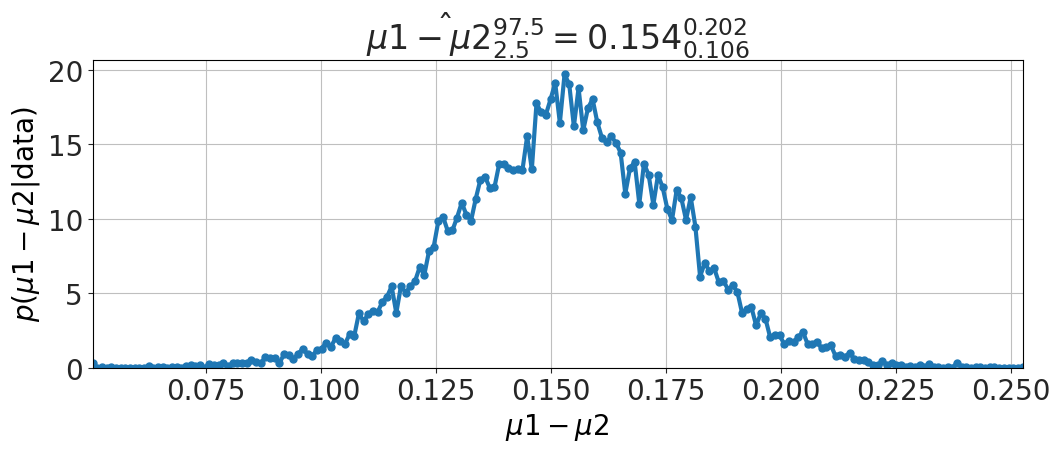

In [ ]:
model.plot_distributions('μ1-μ2')

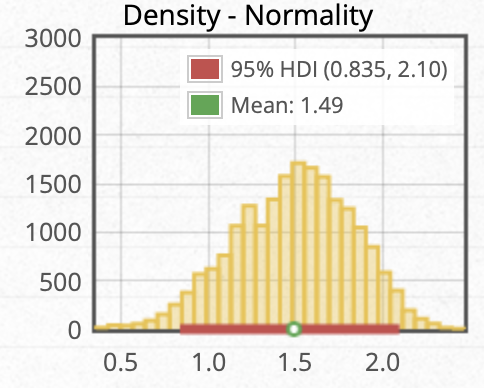

Text(0.5, 0.5, 'Normality')

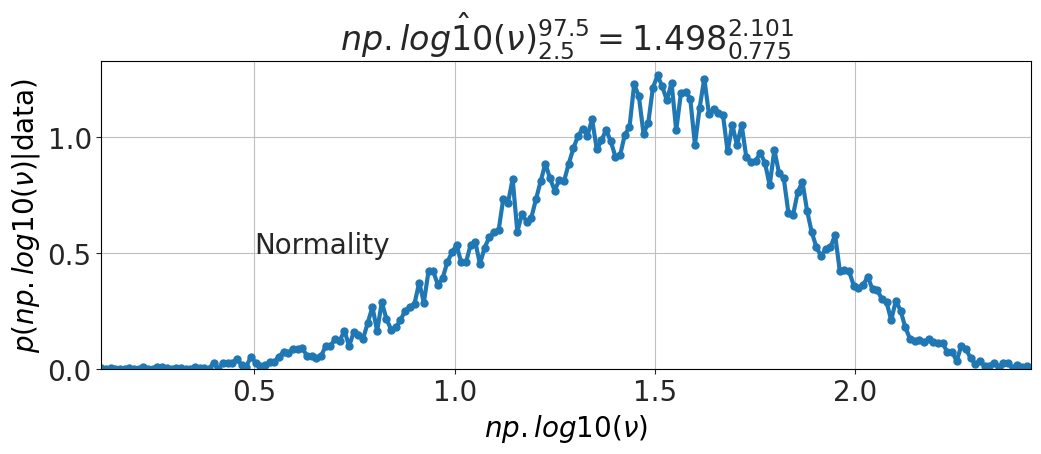

In [ ]:
model.plot_distributions('np.log10(ν)')
text(0.5,0.5,'Normality')

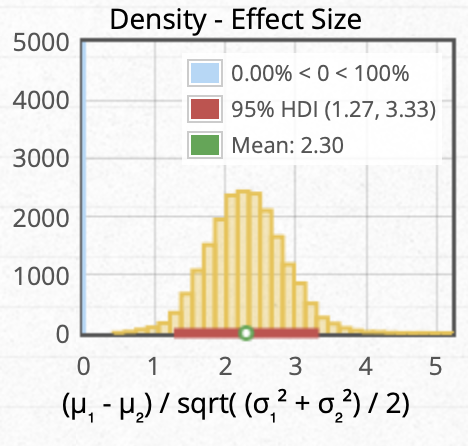

Text(0.8, 0.5, 'Effect Size')

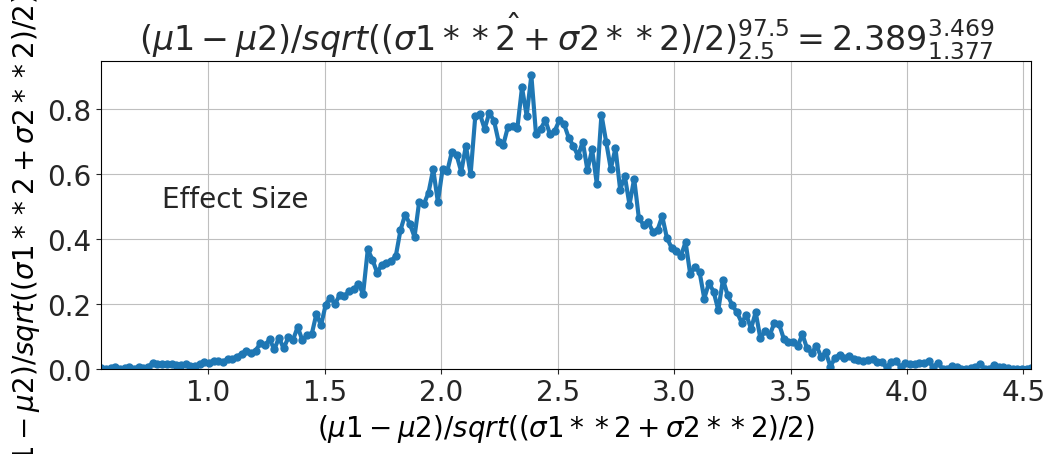

In [ ]:
model.plot_distributions('(μ1-μ2)/sqrt((σ1**2+σ2**2)/2)')
text(0.8,0.5,'Effect Size')